In [2]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [14]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [ ]:
def first_node(state: AgentState) -> AgentState:
    """This is the first node of our sequence"""
    state["final"] = f"Hi {state["name"]}!"
    return state


def second_node(state: AgentState) -> AgentState:
    """This is the second node of our sequence"""
    state["final"] = state["final"] + \
        f" You are {state["age"]} years old!"   # Concatenate to previous result to solve logical error
    return state

In [16]:
graph = StateGraph(AgentState)

graph.add_node("1st_node", first_node)
graph.add_node("2nd_node", second_node)

graph.set_entry_point("1st_node")  # starting node
graph.add_edge("1st_node", "2nd_node")  # edge from first to second node
graph.set_finish_point("2nd_node")  # ending node

app = graph.compile()  # compile the graph

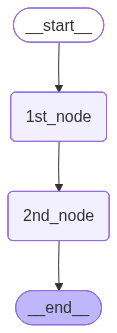

In [17]:
# Vissualize the graph
from IPython.display import Image, display
# Render the graph as a PNG image
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
result = app.invoke({"name": "David", "age": 27})
print(result)

{'name': 'David', 'age': 27, 'final': 'Hi David! You are 27 years old!'}
